# EDA

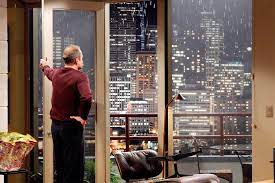

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Business Case
---

Client: Charles Christensen <br></br>
Type: Seller <br></br>
Needs:
 * Invest with big returns
 * Is renovation worth it?
 * Which neighborhoods are appropriate?
 * When is the best timing for actions?

---


## 2. Data Browsing
### 2.1 Sales
First, check out the data containing the sales for each house-ID by date.

In [2]:
# load data and get first overview
df_sales = pd.read_csv('./data/eda.csv')
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [3]:
# check structure of data set:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB


In [4]:
df_sales.duplicated().sum()

0

In [5]:
# check column names for trailing whitespace:
df_sales.columns

Index(['date', 'price', 'house_id', 'id'], dtype='object')

#### Info on sales dataset:
 * The dataset contains 21597 entries by 4 columns.
 * The column "date" is currently an object and should be converted.
 * There are no duplicate values.
 * There are no *obvious* missing values.

This dataset by itself can already tell me the seasonality of overall sales, prices, and the interaction of sales and prices.
I can also check how often individual houses are sold and what the average hold-period looks like.

---

### 2.2 Details of houses
Now, I check the dataset for the house details.

In [6]:
df_detail = pd.read_csv('./data/eda_details.csv')
df_detail.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [7]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

In [8]:
df_detail.duplicated().sum()

0

In [9]:
# check column names for trailing whitespace:
df_detail.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Info on detail dataset:
 * The detail dataset contains 21420 entries on 19 columns.
 * The columns waterfront, view, sqft_basement, yr_renovated contain missing values.
 * Sceptic about the Dtype of some variables, like 'view', 'grade'.
 * Change type of Zipcode to object.
 * Sometimes not really clear what the columns describe.

From this first glance not everything about this dataset is clear. Further investigation is needed to understand the value of each variable.
Informations can be found in the `column_names.md` file.
 
Check variables for further details:

In [10]:
# View
df_detail.view.unique()
# probably categorical? or count? not clear.

array([ 0.,  3.,  2.,  4.,  1., nan])

In [11]:
df_detail.grade.unique()
# 10 different grades, ranging from 3 to 13. No idea what that means.

array([ 7,  6,  8, 10,  5,  9, 11, 13, 12,  4,  3])

## 3. Clean and explore data
### 3.1 Sales

#### 3.1.1 Cleaning

In [12]:
# change date to a datetime format
df_sales.date = pd.to_datetime(df_sales.date, format = '%Y-%m-%d')
df_sales.id = df_sales.id.astype(object)
df_sales.house_id = df_sales.house_id.astype(object)

In [13]:
print(df_sales.info())
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      21597 non-null  datetime64[ns]
 1   price     21597 non-null  float64       
 2   house_id  21597 non-null  object        
 3   id        21597 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 675.0+ KB
None
        date      price    house_id id
0 2014-10-13 221900.000  7129300520  1
1 2014-12-09 538000.000  6414100192  2
2 2015-02-25 180000.000  5631500400  3
3 2014-12-09 604000.000  2487200875  4
4 2015-02-18 510000.000  1954400510  5


#### 3.1.2 Exploration

In [14]:
# Check numeric variables:
df_sales.describe()

,date,price
count,21597,21597.000
mean,2014-10-29 04:20:38.171968512,540296.574
min,2014-05-02 00:00:00,78000.000
25%,2014-07-22 00:00:00,322000.000
50%,2014-10-16 00:00:00,450000.000
75%,2015-02-17 00:00:00,645000.000
max,2015-05-27 00:00:00,7700000.000
std,NaN,367368.140


Info's gained from numeric variables:
 * The time of the dataset ranges from 02-05-2014 to 27-05-2015, so roughly one full year.
 * Prices range from 78.000 (probably US-Dollar) up 7.7 million.
 * The average house prices lies at 540.000 Dollar, the median at 450.000 Dollar, indicating potential outliers on the higher priced segment.

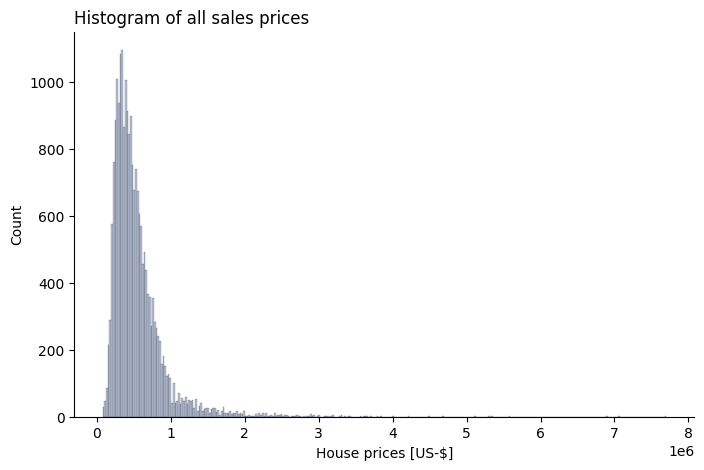

In [15]:
# How does the price distribution look like?
price_hist = sns.histplot(df_sales, x = 'price',
                         color = '#a3b0ce')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Histogram of all sales prices', loc = 'left')
plt.xlabel('House prices [US-$]')

fig = price_hist.get_figure()
fig.savefig("./plots/exploration/01_price_hist.png")

In [16]:
# How often do individual houses get sold within a year?
df_sales.groupby('house_id').aggregate('count').date.value_counts()

date
1    21244
2      175
3        1
Name: count, dtype: int64

In [17]:
# Check out the temporal fluctuation of sales.
df_sales['year_month'] = df_sales.date.dt.to_period('M')
df_sales.head()

,date,price,house_id,id,year_month
0,2014-10-13,221900.000,7129300520,1,2014-10
1,2014-12-09,538000.000,6414100192,2,2014-12
2,2015-02-25,180000.000,5631500400,3,2015-02
3,2014-12-09,604000.000,2487200875,4,2014-12
4,2015-02-18,510000.000,1954400510,5,2015-02


In [18]:
df_sales = df_sales.sort_values('year_month')
df_sales.head()

,date,price,house_id,id,year_month
13153,2014-05-03,379880.000,1523069197,13154,2014-05
5350,2014-05-14,766950.000,7574910780,5351,2014-05
9380,2014-05-09,201500.000,8857600490,9381,2014-05
16328,2014-05-07,280000.000,2895550280,16329,2014-05
1832,2014-05-21,189650.000,9315300260,1833,2014-05


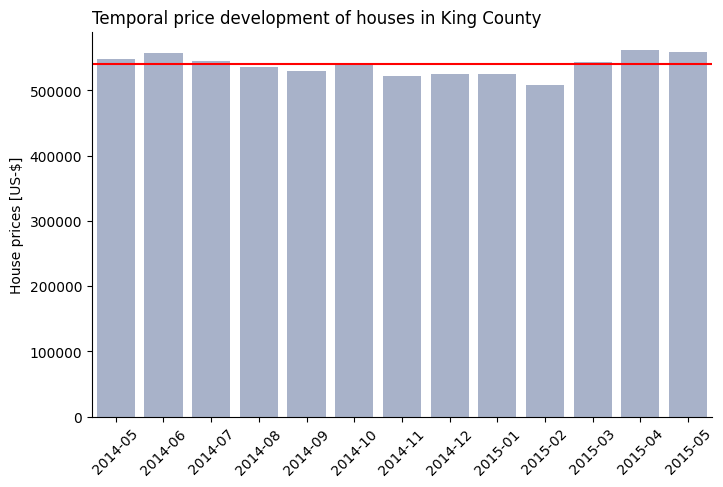

In [19]:
# check prices per month
price_per_month = sns.barplot(df_sales,
           x = 'year_month',
           y = 'price',
           color = '#a3b0ce',
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_per_month.axhline(df_sales.price.mean(), color = 'red')
price_per_month.set_xticklabels(price_per_month.get_xticklabels(), rotation = 45)
plt.title('Temporal price development of houses in King County', loc = 'left')
plt.xlabel(None)
plt.ylabel('House prices [US-$]')

fig = price_per_month.get_figure()
fig.savefig("./plots/exploration/02_price_temp.png")

##### Insights
 * 75 % of the houses are sold for less than 645.000 US-Dollar.
 * Only 176 houses, representing 0.8% of the overall houses, get re-sold within a year.
 * Looking at all houses, prices drop in winter but reach their max between April and July.

### 3.2 House Details

In [20]:
# change zipcode to an object dtype
df_detail.zipcode = df_detail.zipcode.astype(object)

In [21]:
# Check the waterfront
df_detail.waterfront.unique()

# Output is binary. So what does 'nan' mean in this context? Maybe check Houses of the same ZipCode. 
# When all do not have a waterfront, it is pretty likely that there is none.
# However, currently it is not the most interesting column for me. If necessary, come back later.

df_detail.waterfront.isna().sum()

2360

In [22]:
df_detail.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [23]:
# Check yr_renovated
df_detail.yr_renovated.unique()

# Problematic in current form, needs cleaning.
def clean_yr(checklist):
    checklist = checklist.fillna(0)
    catchlist = [i[0:4] if i != '0.0' else np.nan for i in checklist.astype(str)]
    catchlist = pd.to_datetime(catchlist, format = '%Y', errors = 'coerce')
    return catchlist
    
df_detail['yr_r_clean'] = clean_yr(df_detail['yr_renovated'])
df_detail['yr_r_clean'] = df_detail.yr_r_clean.dt.year
df_detail.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,NaN
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000,NaN
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000,NaN
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000,NaN
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000,NaN


In [24]:
# create additional informations regarding renovation.
# This is important to answer the clients questions.

# binary if renovation took place or not:
df_detail['yr_bin'] = df_detail['yr_r_clean'].notnull()

# change yr_built to datetime
df_detail.yr_built = pd.to_datetime(df_detail.yr_built, format = '%Y')
df_detail.yr_built = df_detail.yr_built.dt.year

# calculate difference between built and renovation
df_detail['yr_r_time'] = df_detail['yr_r_clean'].sub(df_detail['yr_built'])

df_detail.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_bin,yr_r_time
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,NaN,False,NaN
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,...,1955,0.000,98155,47.775,-122.304,1320.000,8319.000,NaN,False,NaN
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,...,1954,0.000,98188,47.432,-122.292,1310.000,7491.000,NaN,False,NaN
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,...,1955,NaN,98188,47.433,-122.292,1300.000,7732.000,NaN,False,NaN
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,...,1954,0.000,98188,47.436,-122.290,980.000,8125.000,NaN,False,NaN


### Time to combine datasets
For now it was ok to handle each dataset separate, now it is time to combine them and check further relationships.

In [25]:
df_detail.rename(columns = {'id':'house_id'}, inplace = True)
df_total = df_sales.merge(df_detail, on = 'house_id', how='left')
print(df_total.columns)
df_total.head()

Index(['date', 'price', 'house_id', 'id', 'year_month', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_r_clean', 'yr_bin', 'yr_r_time'],
      dtype='object')


,date,price,house_id,id,year_month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_r_clean,yr_bin,yr_r_time
0,2014-05-03,379880.000,1523069197,13154,2014-05,3.000,2.500,1650.000,14054.000,1.000,...,1986,0.000,98027,47.482,-122.017,1940.000,87555.000,NaN,False,NaN
1,2014-05-14,766950.000,7574910780,5351,2014-05,3.000,2.500,3030.000,30007.000,1.500,...,1992,0.000,98077,47.743,-122.036,3360.000,34983.000,NaN,False,NaN
2,2014-05-09,201500.000,8857600490,9381,2014-05,3.000,1.000,1160.000,8320.000,1.000,...,1959,0.000,98032,47.383,-122.288,1480.000,7800.000,NaN,False,NaN
3,2014-05-07,280000.000,2895550280,16329,2014-05,3.000,2.500,1600.000,4271.000,2.000,...,2000,0.000,98001,47.330,-122.269,1700.000,4746.000,NaN,False,NaN
4,2014-05-21,189650.000,9315300260,1833,2014-05,2.000,1.750,1100.000,7600.000,1.000,...,1980,0.000,98198,47.414,-122.318,1230.000,7350.000,NaN,False,NaN


### Things to understand
There are still some questions open:
 1. Are grades getting better by increase or by decrease?
 2. Is the view getting better by increase or by decrease?
 
When those questions are answered, it is time to check the correlation and try to reduce the amount of columns for a clearer picture.
 

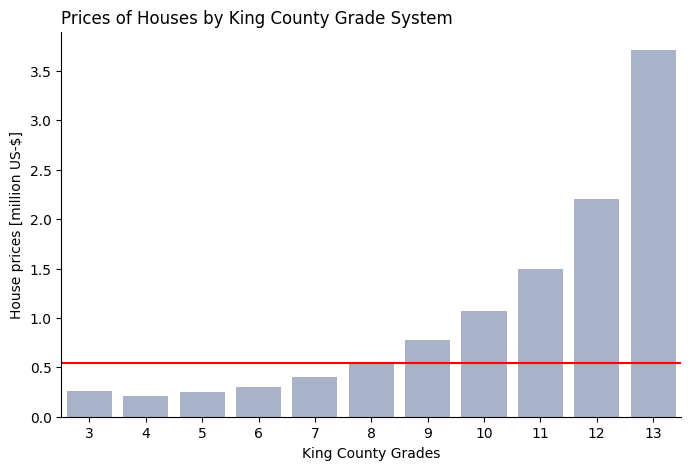

In [26]:
# Answer Q1:
price_per_grade = sns.barplot(df_total.sort_values('grade'),
           x = 'grade',
           y = df_total.sort_values('grade').price / 1000000,
           color = '#a3b0ce',
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_per_grade.axhline(df_total.price.mean()/1000000, color = 'red')
plt.title('Prices of Houses by King County Grade System', loc = 'left')
plt.xlabel('King County Grades')
plt.ylabel('House prices [million US-$]')

fig = price_per_grade.get_figure()
fig.savefig("./plots/exploration/03_price_grade.png")

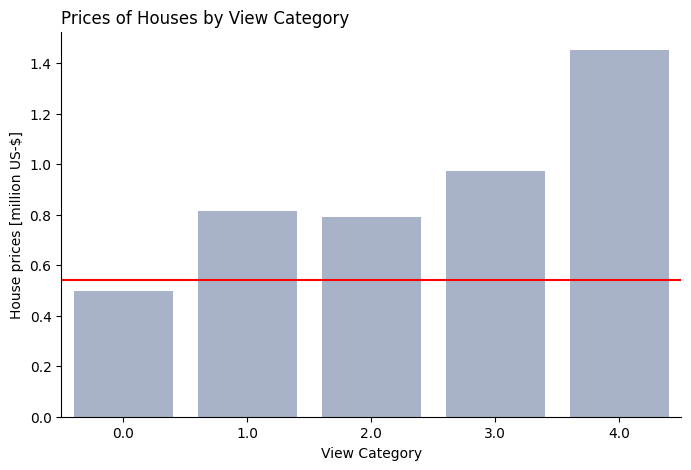

In [27]:
# Answer Q2:
price_per_view = sns.barplot(df_total.sort_values('view'),
           x = 'view',
           y = df_total.sort_values('view').price / 1000000,
           color = '#a3b0ce',
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_per_view.axhline(df_total.price.mean()/1000000, color = 'red')
plt.title('Prices of Houses by View Category', loc = 'left')
plt.xlabel('View Category')
plt.ylabel('House prices [million US-$]')

fig = price_per_view.get_figure()
fig.savefig("./plots/exploration/04_price_view.png")

In [28]:
df_total.view.isnull().sum()

63

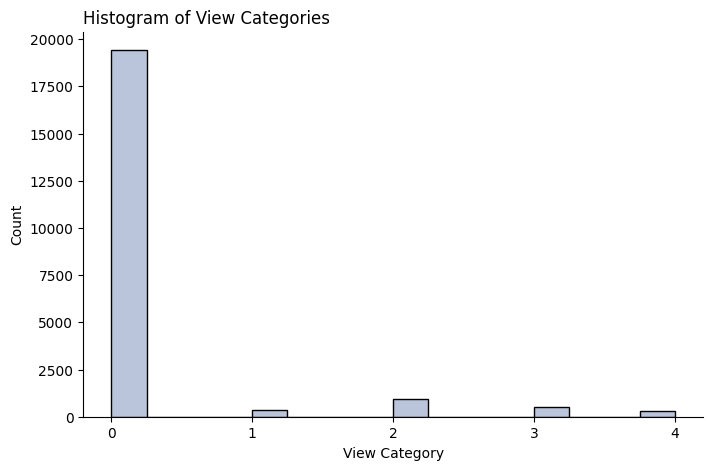

In [29]:
view_hist = sns.histplot(df_total, x = df_total.view.astype(object),
                         color = '#a3b0ce')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Histogram of View Categories', loc = 'left')
plt.xlabel('View Category')
plt.xticks(range(5))

fig = view_hist.get_figure()
fig.savefig("./plots/exploration/05_hist_view.png")

In [30]:
df_total.columns

Index(['date', 'price', 'house_id', 'id', 'year_month', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_r_clean', 'yr_bin', 'yr_r_time'],
      dtype='object')

<Axes: >

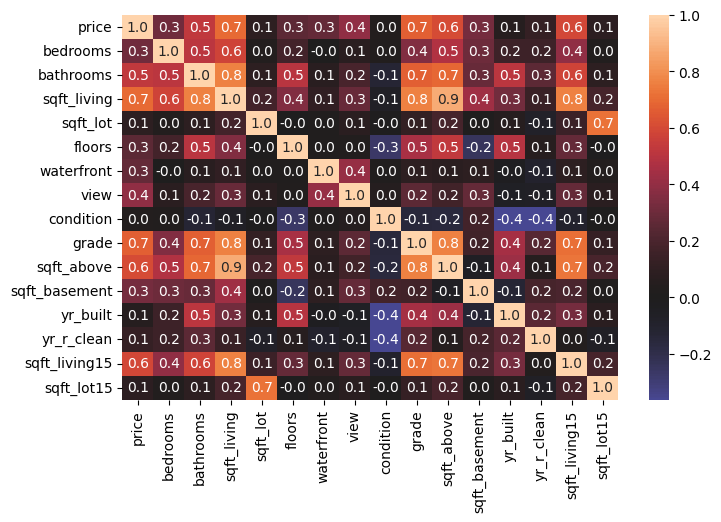

In [31]:
# Check Correlations!
sns.heatmap(df_total[['price', 
                      'bedrooms',
                      'bathrooms',
                      'sqft_living',
                      'sqft_lot',
                      'floors',
                      'waterfront',
                      'view',
                      'condition',
                      'grade',
                      'sqft_above',
                      'sqft_basement',
                      'yr_built',
                      'yr_r_clean',
                      'sqft_living15',
                      'sqft_lot15']].corr(), annot = True, fmt=".1f", center=0)

## Problems / Tasks
 * How to quantify "big returns"?
 * How to check if renovation is worth it?
 * How to check for appropiate neighborhoods?
 * What are the best times for actions? (understand multiple layers.)

---
## 4. Gameplan and Structure of Analyses
Easy Definition of return: 'Money made or lost on an investment over a period of time'. <br></br>
What is a "big return"? -> Define it. <br></br>

How to get a positive return:
 * Buy cheap, sell expensive!
 
Tactics:
 * Use periodical fluctuation.
 * Look for underestimated options (current or by renovation).

The period of time plays a role. With my dataset, I can check explicitly for a one year period. So there are at least two things I can check:
 1. What is the best time for buy and sell within a year (pricewise and countwise)? (Conquers with Point 4)
 2. What are the characteristica of houses, that were resold within a year and ...
 3. When were they sold? Did they have a positive or negative return? What are important points for a high return (big return needs to be defined)?
 <br></br>
 
Another option to check for possible, big returns lies within the lower quantile within each housing category. Look for houses that were sold for way lower prices than expected.


Tasks:
 1. Show periodic fluctuation of prices (barplot, maybe add number of sales via line)
 2. Show the most prominent characteristica of houses resold within one year for short-term trading options. (Re-think how to show that)
 3. Check for house categories with the highest ranges in prices and check the differences between lower and upper quantiles. If there are no big differences, possible indicator to buy. If there are differences, check if a renovation could make sense.
 4. Check if renovation time is a good indicator for prices (after how many years it has been renovated and also, how many years after renovation it has been sold?)
 5. Client wants to know about neighborhoods. Try to link it with house categories for chances!
 
### Wanted output
 * Graphs to show the data, including chances and limitations.
 * Broader idea of where to look for investment possibilities.
 * Give clear:
 1. Introduction to Chances and Limitation of Dataset 
 2. Thought process for high return.
 3. House categories with highest price/chance to resell. (including list of hot candidates)
 4. House with the highest chance of higher resell price AFTER renovation(be cautious again)
 5. 3 best and worst neighborhoods to look at for houses (hot/cold, maybe map? -> only if clear trend).
 5. Periodic advice for buy/sell and renovation (time after build and time after sale) (but don't miss the problems)


### Caution 
 * I only have one year data. This is not a solid foundation for future predicitions.
 * I do not have price development data over time, so it is hard to make good long-term decisions.
 * I can't be sure if the price development of the last year will be true for the next year either.
 * I don't know what the house were worth before renovation.
 * I don't know, what the renovations looked like .
 * I don't know how much the renovation did cost.
 * I don't know how long the renovation took.

In [32]:
# Export dataset:
df_total.to_csv('./data/processed_data.csv', index = False)